### Import libraries and create DataFrame from csv 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read, preprocess, and aggregate full season data
def read_data():
    # Read the full season data
    data = pd.read_excel("QB_Data.xlsx")

    # Preprocess full season data, drop irrelevant columns and convert data types
    data.drop(['FL', 'ROST'], axis=1, inplace=True)
    convert = data.select_dtypes('object').columns.difference(['Player'])
    data[convert] = data[convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce')).fillna(0)
    data['Rank'] = data['Rank'].astype('Int64')

    return data

# Load the full season data
df = read_data()

# Recalculate 'Rank' based on 'FPTS' in descending order
df['Rank'] = df['FPTS'].rank(ascending=False, method='min').astype('int')

# Sort the DataFrame by 'Rank'
df = df.sort_values(by='Rank')

df.head(20)

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,G,FPTS,FPTS/G
0,1,Josh Allen (BUF),385,579,66.5,4306,7.4,29,18,24,111,524,15,17,410.9,24.2
1,2,Jalen Hurts (PHI),352,538,65.4,3858,7.2,23,15,36,157,605,15,17,371.9,21.9
2,3,Dak Prescott (DAL),410,590,69.5,4516,7.7,36,9,39,55,242,2,17,352.0,20.7
3,4,Lamar Jackson (BAL),307,457,67.2,3678,8.0,24,7,37,148,821,5,16,338.2,21.1
4,5,Jordan Love (GB),372,579,64.2,4159,7.2,32,11,30,50,247,4,17,330.1,19.4
5,6,Brock Purdy (SF),308,444,69.4,4280,9.6,31,11,28,39,144,2,16,306.6,19.2
6,7,Jared Goff (DET),407,605,67.3,4575,7.6,30,12,30,32,21,2,17,302.9,17.8
7,8,Patrick Mahomes II (KC),401,597,67.2,4183,7.0,27,14,27,75,389,0,16,294.1,18.4
8,9,Tua Tagovailoa (MIA),388,560,69.3,4624,8.3,29,14,29,35,74,0,17,284.4,16.7
9,10,Baker Mayfield (TB),364,566,64.3,4044,7.1,28,10,40,62,163,1,17,284.0,16.7


### Convert relevant stats to a per-game basis and create the final stats for analysis

In [10]:
# Define columns for per-game calculation
per_game = list(df.columns[2:])

# Define columns to exclude from the per-game calculation
exclude_per_game = ['PCT', 'Y/A', 'G', 'FPTS', 'FPTS/G']

# Create columns and convert stats to a per-game basis for the defined columns, not those in the exclude list
for col in per_game:
    if col not in exclude_per_game:
        df[col + '/game'] = (df[col] / df['G']).round(1)

# Define final columns to be used for analysis, combines excluded and new per-game columns
final_columns = exclude_per_game + [col + '/game' for col in per_game if col not in exclude_per_game]

# Display final columns with 'Rank' and 'Player'
df[['Rank', 'Player'] + final_columns].head(10)

,Rank,Player,PCT,Y/A,G,FPTS,FPTS/G,CMP/game,ATT/game,YDS/game,TD/game,INT/game,SACKS/game,ATT.1/game,YDS.1/game,TD.1/game
0,1,Josh Allen (BUF),66.5,7.4,17,410.9,24.2,22.6,34.1,253.3,1.7,1.1,1.4,6.5,30.8,0.9
1,2,Jalen Hurts (PHI),65.4,7.2,17,371.9,21.9,20.7,31.6,226.9,1.4,0.9,2.1,9.2,35.6,0.9
2,3,Dak Prescott (DAL),69.5,7.7,17,352.0,20.7,24.1,34.7,265.6,2.1,0.5,2.3,3.2,14.2,0.1
3,4,Lamar Jackson (BAL),67.2,8.0,16,338.2,21.1,19.2,28.6,229.9,1.5,0.4,2.3,9.2,51.3,0.3
4,5,Jordan Love (GB),64.2,7.2,17,330.1,19.4,21.9,34.1,244.6,1.9,0.6,1.8,2.9,14.5,0.2
5,6,Brock Purdy (SF),69.4,9.6,16,306.6,19.2,19.2,27.8,267.5,1.9,0.7,1.8,2.4,9.0,0.1
6,7,Jared Goff (DET),67.3,7.6,17,302.9,17.8,23.9,35.6,269.1,1.8,0.7,1.8,1.9,1.2,0.1
7,8,Patrick Mahomes II (KC),67.2,7.0,16,294.1,18.4,25.1,37.3,261.4,1.7,0.9,1.7,4.7,24.3,0.0
8,9,Tua Tagovailoa (MIA),69.3,8.3,17,284.4,16.7,22.8,32.9,272.0,1.7,0.8,1.7,2.1,4.4,0.0
9,10,Baker Mayfield (TB),64.3,7.1,17,284.0,16.7,21.4,33.3,237.9,1.6,0.6,2.4,3.6,9.6,0.1


### Calculate the correlations for the final stats across different conditions

In [11]:
# Define columns and columns to exclude for correlation calculation, from final columns
exclude_corr = ['FPTS/G', 'FPTS', 'G']
corr_columns = [col for col in final_columns if col not in exclude_corr]

# Define a function to calculate correlations
def compute_correlations(dataframe, corr_columns):
    return dataframe[corr_columns].corrwith(dataframe['FPTS/G'])

# Compute correlations for various conditions
corr_all = compute_correlations(df, corr_columns)
corr_nonzero = compute_correlations(df[df['FPTS/G'] > 0], corr_columns)
corr_top50 = compute_correlations(df[df['Rank'] <= 50], corr_columns)
corr_top25 = compute_correlations(df[df['Rank'] <= 25], corr_columns)

# Compile all correlations into a DataFrame for comparison
df_corr = pd.DataFrame({
    'All Players': corr_all,
    'FPTS > 0': corr_nonzero,
    'Top 50 Players': corr_top50,
    'Top 25 Players': corr_top25
})

# Calculate the average correlation across the four conditions, adding 'Average' column to DataFrame
df_corr['Correlation'] = df_corr.mean(axis=1)

# Display the correlation DataFrame
df_corr.round(2)

,All Players,FPTS > 0,Top 50 Players,Top 25 Players,Correlation
PCT,0.72,-0.03,0.33,0.47,0.37
Y/A,0.54,-0.08,0.42,0.48,0.34
CMP/game,0.92,0.88,0.69,0.30,0.69
ATT/game,0.90,0.86,0.63,0.15,0.64
YDS/game,0.94,0.91,0.78,0.54,0.79
TD/game,0.93,0.91,0.83,0.68,0.84
INT/game,0.52,0.35,0.11,0.12,0.28
SACKS/game,0.65,0.50,-0.16,-0.39,0.15
ATT.1/game,0.63,0.59,0.41,0.49,0.53
YDS.1/game,0.59,0.54,0.37,0.42,0.48


### Assign the weights for the final stats

In [12]:
# Calculate R^2 for the 'Average' correlation, adding 'R^2' column to DataFrame
df_corr['R^2'] = df_corr['Correlation'] ** 2

# Define the specific stats for which you want to assign weights
specific_stats = ['CMP/game',
                'ATT/game',
                'YDS/game',
                'TD/game']

# Define the calculation to assign weights
def weight_calc(row, specific_stats):
    if row.name in specific_stats:
        return 1 + row['R^2']  # Assign weight based on R^2 for specific stats
    else:
        return 1  # Default weight for other stats
    
# Assign weights based on the given criteria, adding 'Weight' column to DataFrame
df_corr['Weight'] = df_corr.apply(weight_calc, specific_stats=specific_stats, axis=1)

# Display the new columns in the DataFrame
df_corr[['Correlation', 'R^2', 'Weight']].round(2)

,Correlation,R^2,Weight
PCT,0.37,0.14,1.00
Y/A,0.34,0.12,1.00
CMP/game,0.69,0.48,1.48
ATT/game,0.64,0.41,1.41
YDS/game,0.79,0.63,1.63
TD/game,0.84,0.70,1.70
INT/game,0.28,0.08,1.00
SACKS/game,0.15,0.02,1.00
ATT.1/game,0.53,0.28,1.00
YDS.1/game,0.48,0.23,1.00


### Multiply the assigned weights to the final stats

In [13]:
# Multiply each relevant column by its corresponding weight
for col in corr_columns:
    weight = df_corr.loc[col, 'Weight']
    df[col + '_weighted'] = (df[col] * weight).round(1)

# Extract the weighted columns
weight_columns = [col + '_weighted' for col in corr_columns]

# Display the new weighted stats columns
df_weight = df[['Rank', 'Player', 'FPTS/G'] + weight_columns]
df_weight.sort_values(by=['FPTS/G'],ascending=False).head(10)

,Rank,Player,FPTS/G,PCT_weighted,Y/A_weighted,CMP/game_weighted,ATT/game_weighted,YDS/game_weighted,TD/game_weighted,INT/game_weighted,SACKS/game_weighted,ATT.1/game_weighted,YDS.1/game_weighted,TD.1/game_weighted
0,1,Josh Allen (BUF),24.2,66.5,7.4,33.5,47.9,413.1,2.9,1.1,1.4,6.5,30.8,0.9
1,2,Jalen Hurts (PHI),21.9,65.4,7.2,30.7,44.4,370.1,2.4,0.9,2.1,9.2,35.6,0.9
31,32,Joe Flacco (IND),21.8,60.3,7.9,36.4,57.3,527.1,4.4,1.6,1.6,1.8,0.4,0.0
3,4,Lamar Jackson (BAL),21.1,67.2,8.0,28.4,40.2,375.0,2.6,0.4,2.3,9.2,51.3,0.3
2,3,Dak Prescott (DAL),20.7,69.5,7.7,35.7,48.8,433.2,3.6,0.5,2.3,3.2,14.2,0.1
4,5,Jordan Love (GB),19.4,64.2,7.2,32.4,47.9,398.9,3.2,0.6,1.8,2.9,14.5,0.2
23,24,Kirk Cousins (ATL),19.4,69.5,7.5,40.0,54.7,475.3,3.7,0.6,2.1,1.8,3.1,0.0
5,6,Brock Purdy (SF),19.2,69.4,9.6,28.4,39.1,436.3,3.2,0.7,1.8,2.4,9.0,0.1
26,27,Kyler Murray (ARI),18.9,65.7,6.7,32.6,47.1,366.8,2.0,0.6,2.2,5.5,30.5,0.4
10,11,C.J. Stroud (HOU),18.7,63.9,8.2,31.5,46.8,446.7,2.6,0.3,2.5,2.6,11.1,0.2


### Calculate each player's average weighted score and rank them from high to low

In [14]:
# Define select columns to be used for the average weighted score
avg = ['CMP/game_weighted',
 'ATT/game_weighted',
 'YDS/game_weighted',
 'TD/game_weighted',
 'FPTS/G']

# Calculate the average weighted score for the select columns
df['Score'] = df[avg].mean(axis=1).round(1)

# Rank both of the average weighted scores with NaN handling
df['Final Rank'] = df.sort_values('Score', ascending=False)\
                ['Score'].rank(method='first', ascending=False, na_option='bottom').astype(int)

# Calculate the variance in ranking both ranks
df['Variance'] = df['Rank'] - df['Final Rank']

### Display results of the average weighted score and rank

In [15]:
# List of columns to be excluded
final_columns_exclude = ['Y/A', 'INT/game', 'SACKS/game']

# Exclude the specified columns from final_columns
final_columns = [col for col in final_columns if col not in final_columns_exclude]

# Create final analysis columns
analysis = df[['Rank', 'Final Rank', 'Player', 'Score', 'Variance'] + final_columns]
analysis.set_index('Rank', inplace=True)
analysis = analysis.sort_values(by='Final Rank', ascending=True)

# Export to Excel
analysis.to_excel("QB_Analysis.xlsx", index=False)

# Display the top 30 rows
analysis.head(30)

,Final Rank,Player,Score,Variance,PCT,G,FPTS,FPTS/G,CMP/game,ATT/game,YDS/game,TD/game,ATT.1/game,YDS.1/game,TD.1/game
Rank,,,,,,,,,,,,,,,
32,1,Joe Flacco (IND),129.4,31,60.3,5,108.9,21.8,24.6,40.8,323.2,2.6,1.8,0.4,0.0
24,2,Kirk Cousins (ATL),118.6,22,69.5,8,154.9,19.4,27.0,38.9,291.4,2.2,1.8,3.1,0.0
11,3,C.J. Stroud (HOU),109.3,8,63.9,15,281.1,18.7,21.3,33.3,273.9,1.5,2.6,11.1,0.2
7,4,Jared Goff (DET),109.0,3,67.3,17,302.9,17.8,23.9,35.6,269.1,1.8,1.9,1.2,0.1
9,5,Tua Tagovailoa (MIA),108.6,4,69.3,17,284.4,16.7,22.8,32.9,272.0,1.7,2.1,4.4,0.0
3,6,Dak Prescott (DAL),108.4,-3,69.5,17,352.0,20.7,24.1,34.7,265.6,2.1,3.2,14.2,0.1
8,7,Patrick Mahomes II (KC),107.4,1,67.2,16,294.1,18.4,25.1,37.3,261.4,1.7,4.7,24.3,0.0
15,8,Matthew Stafford (LAR),106.3,7,62.6,15,254.3,17.0,21.7,34.7,264.3,1.6,1.4,4.3,0.0
6,9,Brock Purdy (SF),105.2,-3,69.4,16,306.6,19.2,19.2,27.8,267.5,1.9,2.4,9.0,0.1


### Compare per-game stats of two players and visualize the results

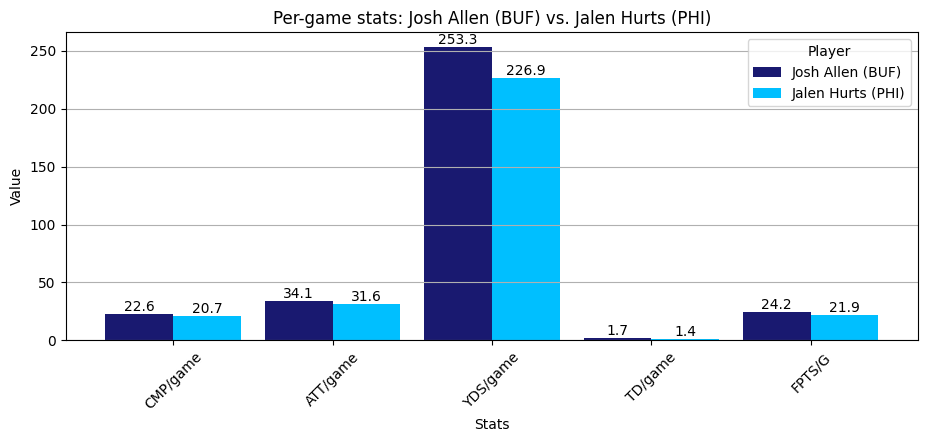

,Final Rank,PCT,G,FPTS,FPTS/G,CMP/game,ATT/game,YDS/game,TD/game,ATT.1/game,YDS.1/game,TD.1/game
Player,,,,,,,,,,,,
Josh Allen (BUF),10,66.5,17,410.9,24.2,22.6,34.1,253.3,1.7,6.5,30.8,0.9
Jalen Hurts (PHI),19,65.4,17,371.9,21.9,20.7,31.6,226.9,1.4,9.2,35.6,0.9


In [16]:
# Prompt the user to input the name of the players
player1 = input("Enter player 1 name")
player2 = input("Enter player 2 name")

# Extract and reorder rows for the two specified players
# Filter rows where the 'Player' column contains the names entered by the user
players = df[df['Player'].str.contains(player1) | df['Player'].str.contains(player2)]
players.set_index('Player', inplace=True)
player1_match = players.index[0] if player1 in players.index[0] else players.index[1]
player2_match = players.index[1] if player2 in players.index[1] else players.index[0]
players = players.reindex([player1_match, player2_match])

# Define columns to be compared
compare_columns = [col.replace('_weighted', '') for col in avg]

# Define a function to compare per-game stats of two players
def compare(player1, player2):

    # Plot the data
    chart = players[compare_columns].T.plot(kind='bar',
                                            color=['midnightblue', 'deepskyblue'],
                                            width=0.85,
                                            figsize=(11,4))

    # Format chart
    plt.title(f'Per-game stats: {player1} vs. {player2}')
    plt.xlabel('Stats')
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.xticks(rotation=45)

    # Add data labels above the bars
    for p in chart.patches:
        chart.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

    plt.show()

# Call the 'compare' function which creates and displays the visualization
compare(player1_match, player2_match)
players[['Final Rank'] + final_columns]